In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

### "Durus_Van_TShirt-Elbise_240820.v4." Dosyasının Okunması

In [22]:
# Veri kümesini oku
df = pd.read_csv('Durus_Van_TShirt-Elbise_240820.v4.csv', sep=';')

In [23]:
# Belirli kolonları seçmek için
selected_columns = ['PersonelNo','PersonelAdi',
                    'ModelID','ModelAdi','ModelTipAdi',
                    'OrderNo','MakinaTipi','Uretim','DurusSuresi','DurusAdi','UretimTarih'] 
print(len(df))


16248


In [24]:
df[selected_columns].head()

,PersonelNo,PersonelAdi,ModelID,ModelAdi,ModelTipAdi,OrderNo,MakinaTipi,Uretim,DurusSuresi,DurusAdi,UretimTarih
0,21,BÜLENT ÇEKICI,300,TOLS24GTMAC BTW38 DANTELLI TSHIRT,T-SHIRT,BTW38,DÜZ,1474,1275.0,IHTIYAÇ MOLASI,2024-01-02
1,435,YASIN ORHAN,300,TOLS24GTMAC BTW38 DANTELLI TSHIRT,T-SHIRT,BTW38,DÜZ,1702,485.0,IGNE DEGISIMI,2024-01-02
2,435,YASIN ORHAN,300,TOLS24GTMAC BTW38 DANTELLI TSHIRT,T-SHIRT,BTW38,DÜZ,1702,192.0,MAKINE ARIZA,2024-01-02
3,379,ÖZGÜR GÜCER,300,TOLS24GTMAC BTW38 DANTELLI TSHIRT,T-SHIRT,BTW38,ÜTÜ,531,1078.0,IHTIYAÇ MOLASI,2024-01-02
4,51,FATMA CEYLAN,300,TOLS24GTMAC BTW38 DANTELLI TSHIRT,T-SHIRT,BTW38,OVERLOK,170,254.0,IS BEKLEME,2024-01-02


### "Siparis_240820.v4" Dosyasının Okunması

In [25]:
# Veri kümesini oku
df_siparis = pd.read_csv('Siparis_240820.v4.csv', sep=';')
# Belirli kolonları seçmek için
selected_columns_2 = ['MES_ModelID','SIPARIS_ADEDI','GIYSI_GRUBU','GIYSI_CINSI','GIYSI_CINSI_DETAYI'] 
print(len(df_siparis))

35


In [26]:
df_siparis[selected_columns_2].head()

,MES_ModelID,SIPARIS_ADEDI,GIYSI_GRUBU,GIYSI_CINSI,GIYSI_CINSI_DETAYI
0,298,14292,ÇOCUK,T-Shirt,Kısa Kol
1,297,32073,BAYAN,T-Shirt,Uzun Kol
2,300,15870,BAYAN,T-Shirt,Kısa Kol
3,307,14170,ÇOCUK,Sweatshirt,Kapşonsuz
4,309,22113,ÇOCUK,Elbise,3/4 kol


### İki Dosyanın Birleştirilmesi

In [27]:
# DataFrame'leri MES_ModelID ve ModelID kolonları üzerinden birleştirme
merged_df = pd.merge(df_siparis[selected_columns_2], df[selected_columns], left_on='MES_ModelID', right_on='ModelID', how='inner')

# ModelID kolonunu DataFrame'den çıkarma
merged_df = merged_df.drop(columns=['MES_ModelID'])

# Birleştirilmiş DataFrame'i gösterme
merged_df.head()

,SIPARIS_ADEDI,GIYSI_GRUBU,GIYSI_CINSI,GIYSI_CINSI_DETAYI,PersonelNo,PersonelAdi,ModelID,ModelAdi,ModelTipAdi,OrderNo,MakinaTipi,Uretim,DurusSuresi,DurusAdi,UretimTarih
0,14292,ÇOCUK,T-Shirt,Kısa Kol,192,SÜKRAN ERTUS,298,308626 TOMMIE TEE ÇIÇEKLI TSHIRT,T-SHIRT,64410-344-11-105,MANUEL,1432,963.0,IHTIYAÇ MOLASI,2024-01-02
1,14292,ÇOCUK,T-Shirt,Kısa Kol,421,NURSEL TUGAY,298,308626 TOMMIE TEE ÇIÇEKLI TSHIRT,T-SHIRT,64410-344-11-105,OVERLOK,74,86.0,IS TAMIRI,2024-01-02
2,14292,ÇOCUK,T-Shirt,Kısa Kol,501,BAHAR BEYGO,298,308626 TOMMIE TEE ÇIÇEKLI TSHIRT,T-SHIRT,64410-344-11-105,MANUEL,704,170.0,IHTIYAÇ MOLASI,2024-01-02
3,14292,ÇOCUK,T-Shirt,Kısa Kol,471,MÜRSEL KARABULUT,298,308626 TOMMIE TEE ÇIÇEKLI TSHIRT,T-SHIRT,64410-344-11-105,ÜTÜ,607,872.0,IHTIYAÇ MOLASI,2024-01-02
4,14292,ÇOCUK,T-Shirt,Kısa Kol,203,NURGÜL YÜKSEK,298,308626 TOMMIE TEE ÇIÇEKLI TSHIRT,T-SHIRT,64410-344-11-105,OVERLOK,67,141.0,IHTIYAÇ MOLASI,2024-01-02


### ID bilgileri ve nümerik olmayanlar tip olarak kategorik veriye dönüştürüldü.

In [28]:
categorical_columns = ['PersonelNo','PersonelAdi','ModelID', 'ModelAdi',
                       'ModelTipAdi', 'OrderNo','MakinaTipi','DurusAdi','GIYSI_GRUBU','GIYSI_CINSI','GIYSI_CINSI_DETAYI']

merged_df[categorical_columns] = merged_df[categorical_columns].astype('category')
merged_df['UretimTarih'] = pd.to_datetime(merged_df['UretimTarih']).dt.strftime('%Y-%m-%d')


In [30]:
print(merged_df.dtypes)

SIPARIS_ADEDI            int64
GIYSI_GRUBU           category
GIYSI_CINSI           category
GIYSI_CINSI_DETAYI    category
PersonelNo            category
PersonelAdi           category
ModelID               category
ModelAdi              category
ModelTipAdi           category
OrderNo               category
MakinaTipi            category
Uretim                   int64
DurusSuresi            float64
DurusAdi              category
UretimTarih             object
dtype: object


### NULL değerler temizlendi.

In [31]:
# Her kolonda kaç tane NA (eksik) değer olduğunu hesapla
na_counts = merged_df.isna().sum()

# En az bir NA değeri olan satır sayısını hesapla
rows_with_na = merged_df.isna().any(axis=1).sum()

# Sonuçları yazdır
print("Kolonlardaki NA sayıları:")
print(na_counts)
print("\nNA değerleri nedeniyle çıkarılacak satır sayısı:", rows_with_na)

merged_df = merged_df.dropna()


merged_df = merged_df.sort_values(by='DurusSuresi',ascending=False)
merged_df.head()

Kolonlardaki NA sayıları:
SIPARIS_ADEDI           0
GIYSI_GRUBU             0
GIYSI_CINSI             0
GIYSI_CINSI_DETAYI      0
PersonelNo              0
PersonelAdi             0
ModelID                 0
ModelAdi                0
ModelTipAdi             0
OrderNo               315
MakinaTipi              0
Uretim                  0
DurusSuresi             1
DurusAdi                0
UretimTarih             0
dtype: int64

NA değerleri nedeniyle çıkarılacak satır sayısı: 316


,SIPARIS_ADEDI,GIYSI_GRUBU,GIYSI_CINSI,GIYSI_CINSI_DETAYI,PersonelNo,PersonelAdi,ModelID,ModelAdi,ModelTipAdi,OrderNo,MakinaTipi,Uretim,DurusSuresi,DurusAdi,UretimTarih
166,14170,ÇOCUK,Sweatshirt,Kapşonsuz,201,ISA TANKAS,307,CVKS24SSP22-BVE32 SWEATSHIRT,T-SHIRT,BVE32,DÜZ,248,20807.0,IS BEKLEME,2024-01-09
14427,14402,ÇOCUK,Sweatshirt,Kapşonsuz,249,DILAN ISIK,414,CVKW24SGPAR-CPL95 BASKILI SWEAT,T-SHIRT,421238-00-421771,DÜZ,1389,16746.0,MANUEL ÇALISMA,2024-07-11
14756,14402,ÇOCUK,Sweatshirt,Kapşonsuz,368,SIMAN POLAT,414,CVKW24SGPAR-CPL95 BASKILI SWEAT,T-SHIRT,421238-00-421771,OVERLOK,1746,14651.0,MANUEL ÇALISMA,2024-07-18
14813,14402,ÇOCUK,Sweatshirt,Kapşonsuz,368,SIMAN POLAT,414,CVKW24SGPAR-CPL95 BASKILI SWEAT,T-SHIRT,421238-00-421771,OVERLOK,1411,14314.0,MANUEL ÇALISMA,2024-07-19
12989,9476,BAYAN,Elbise,uzun kollu elbise,74,HILAL YASAR,398,CDKW24DTURQ-CLP18 SIYAH ELBISE,ELBISE,352180,OVERLOK,297,14046.0,MANUEL ÇALISMA,2024-06-29


In [32]:
merged_df.to_csv("durus_suresi_duzenlenmis.csv",index=False)

### Null olanlar çıkarıldıktan sonra geriye kalan veri sayısı

In [34]:
print(len(merged_df))

15932


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = merged_df
categorical_columns = merged_df.select_dtypes(include=['object', 'category']).columns
numerical_columns = merged_df.select_dtypes(include=['number']).columns

### Kategorik Değişkenlerin Görselleştirilmesi¶

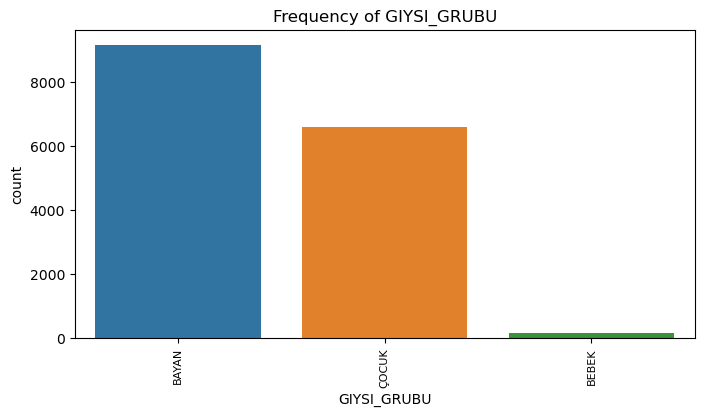

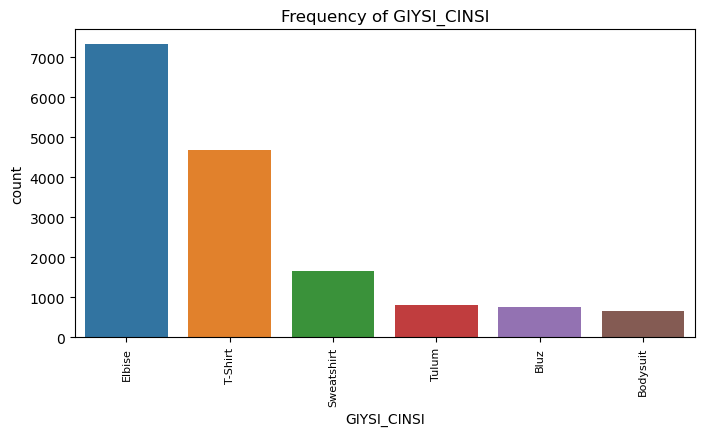

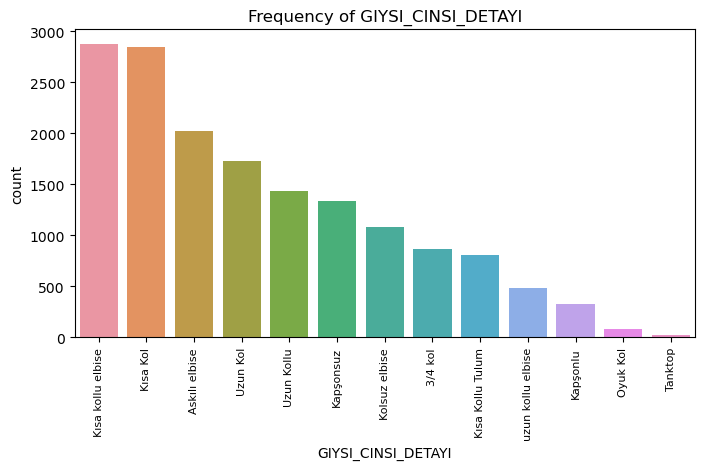

'PersonelNo' kolonunda '594' kategorisi sadece 4 kez tekrar ediyor.
'PersonelNo' kolonunda '35' kategorisi sadece 4 kez tekrar ediyor.
'PersonelNo' kolonunda '567' kategorisi sadece 4 kez tekrar ediyor.
'PersonelNo' kolonunda '621' kategorisi sadece 4 kez tekrar ediyor.
'PersonelNo' kolonunda '357' kategorisi sadece 3 kez tekrar ediyor.
'PersonelNo' kolonunda '627' kategorisi sadece 3 kez tekrar ediyor.
'PersonelNo' kolonunda '496' kategorisi sadece 3 kez tekrar ediyor.
'PersonelNo' kolonunda '527' kategorisi sadece 3 kez tekrar ediyor.
'PersonelNo' kolonunda '566' kategorisi sadece 3 kez tekrar ediyor.
'PersonelNo' kolonunda '576' kategorisi sadece 2 kez tekrar ediyor.
'PersonelNo' kolonunda '585' kategorisi sadece 2 kez tekrar ediyor.
'PersonelNo' kolonunda '492' kategorisi sadece 2 kez tekrar ediyor.
'PersonelNo' kolonunda '487' kategorisi sadece 2 kez tekrar ediyor.
'PersonelNo' kolonunda '311' kategorisi sadece 2 kez tekrar ediyor.
'PersonelNo' kolonunda '532' kategorisi sadece 2 

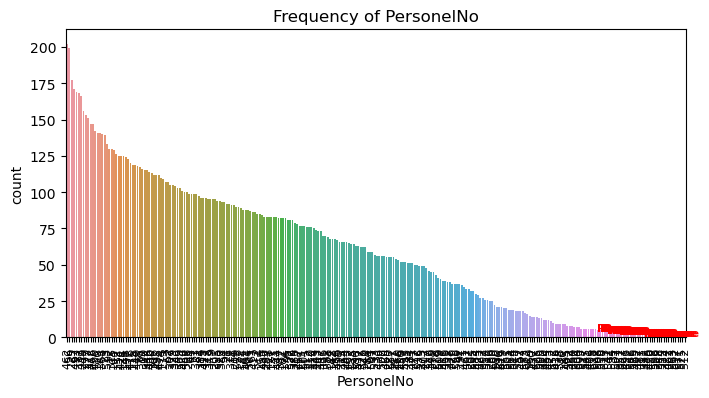

'PersonelAdi' kolonunda 'TAYFUR ALBAR' kategorisi sadece 4 kez tekrar ediyor.
'PersonelAdi' kolonunda 'HASRET SAPKACI' kategorisi sadece 4 kez tekrar ediyor.
'PersonelAdi' kolonunda 'EDIBE SUCI' kategorisi sadece 4 kez tekrar ediyor.
'PersonelAdi' kolonunda 'BEHIYE GÜLEK' kategorisi sadece 4 kez tekrar ediyor.
'PersonelAdi' kolonunda 'DILAN SARIBULAK' kategorisi sadece 3 kez tekrar ediyor.
'PersonelAdi' kolonunda 'HÜSNÜ ABI' kategorisi sadece 3 kez tekrar ediyor.
'PersonelAdi' kolonunda 'BERFIN BAYHAN' kategorisi sadece 3 kez tekrar ediyor.
'PersonelAdi' kolonunda 'SIBEL YILDIRIM' kategorisi sadece 3 kez tekrar ediyor.
'PersonelAdi' kolonunda 'SENEM ATLI' kategorisi sadece 3 kez tekrar ediyor.
'PersonelAdi' kolonunda 'ÇIGDEM AKMAN' kategorisi sadece 2 kez tekrar ediyor.
'PersonelAdi' kolonunda 'BAYRAM ADIYAMAN' kategorisi sadece 2 kez tekrar ediyor.
'PersonelAdi' kolonunda 'ÖZNUR ABALI' kategorisi sadece 2 kez tekrar ediyor.
'PersonelAdi' kolonunda 'NAFIYE SEVEN' kategorisi sadece 2 ke

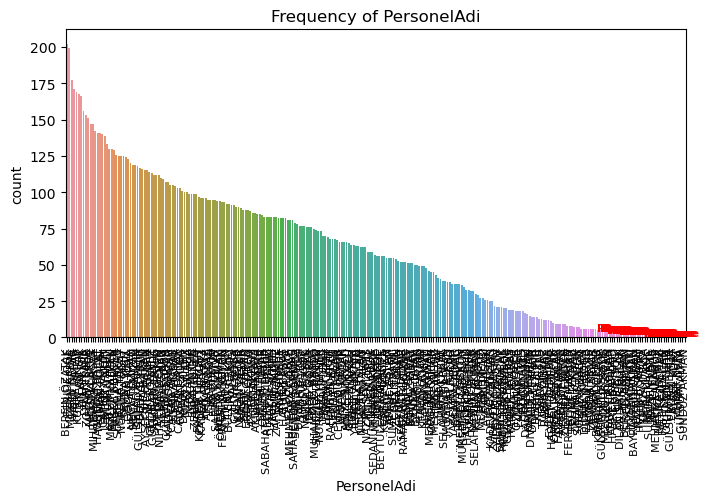

'ModelID' kolonunda '389' kategorisi sadece 0 kez tekrar ediyor.


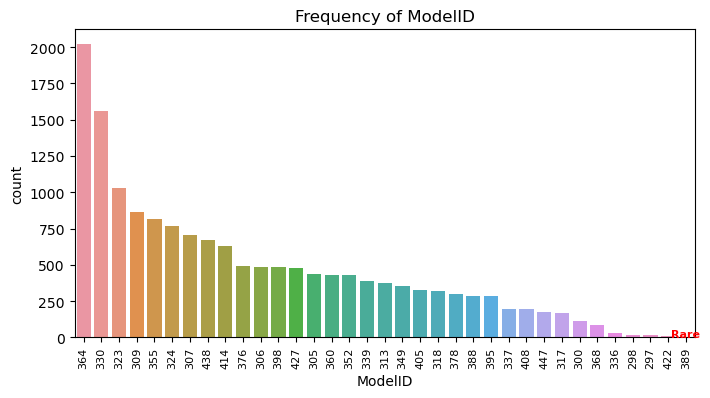

'ModelAdi' kolonunda 'CDKW24HDNDR KIRMIZI TSHIRT' kategorisi sadece 0 kez tekrar ediyor.


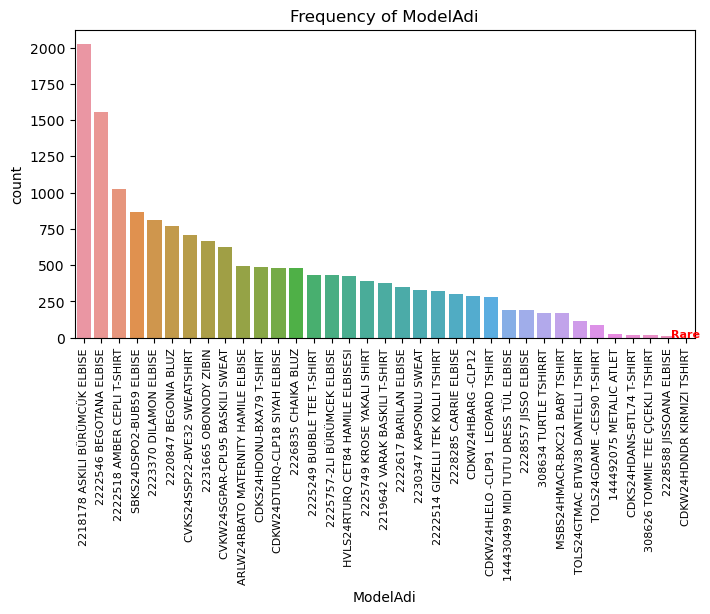

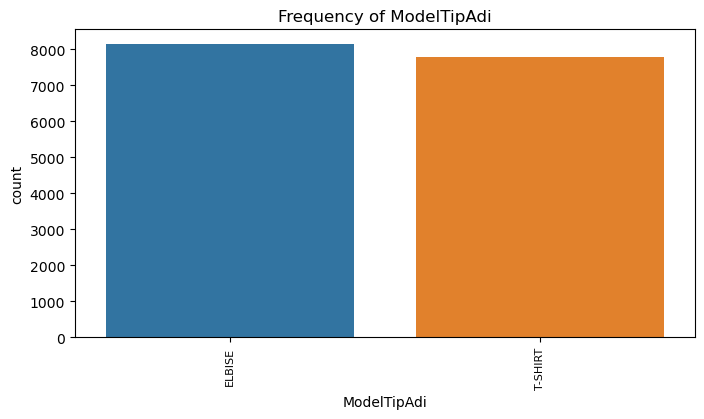

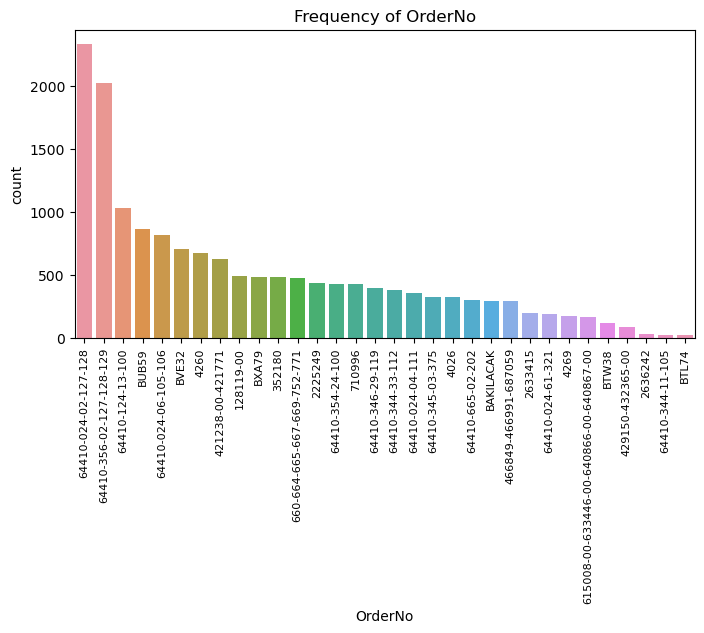

'MakinaTipi' kolonunda 'RACING OVERLOK' kategorisi sadece 2 kez tekrar ediyor.


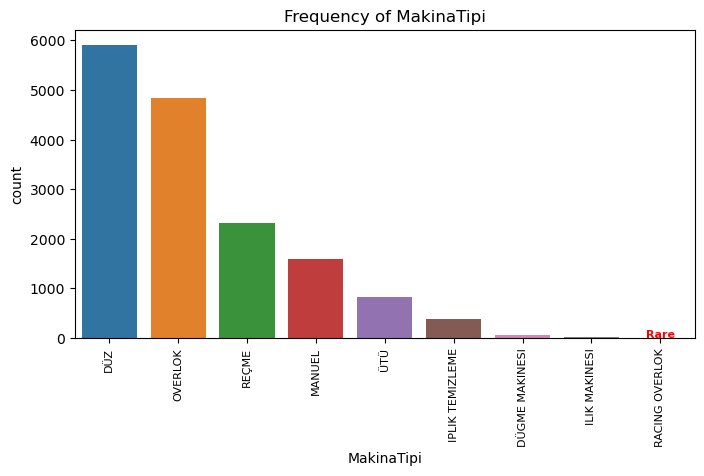

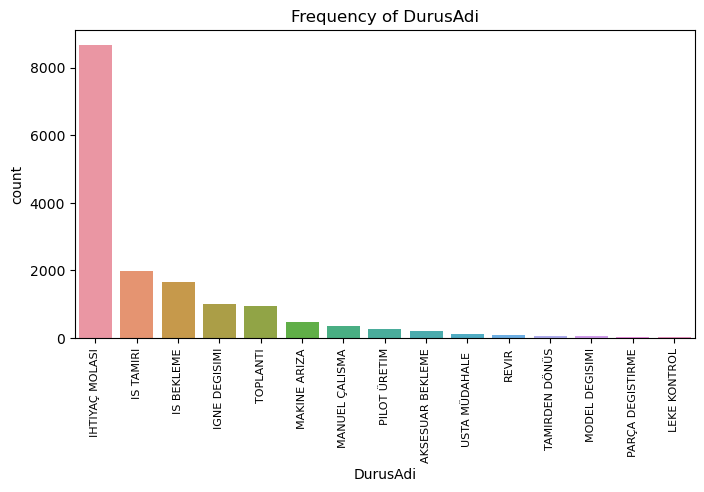

'UretimTarih' kolonunda '2024-01-06' kategorisi sadece 2 kez tekrar ediyor.
'UretimTarih' kolonunda '2024-03-21' kategorisi sadece 1 kez tekrar ediyor.


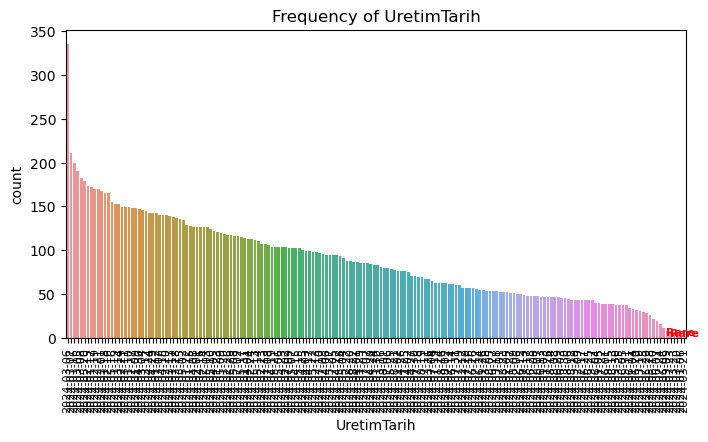

CSV dosyaları kaydedildi: 'durus_suresi_sorted_by_column_category.csv' ve 'durus_suresi_sorted_by_frequency.csv'


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Eşik değeri (threshold) belirleyin
threshold = 5

# Nadir kategorileri saklamak için bir liste oluşturun
rare_categories_list = []

# Kategorik değişkenlerin frekans grafikleri ve nadir kategorilerin işaretlenmesi
for col in categorical_columns:
    plt.figure(figsize=(8, 4))  # Daha küçük bir grafik boyutu ayarlayın
    value_counts = df_filtered[col].value_counts()
    sns.countplot(x=col, data=df_filtered, order=value_counts.index)
    
    # Nadir kategorileri işaretle ve listeye ekle
    rare_categories = value_counts[value_counts < threshold]
    for rare_cat in rare_categories.index:
        print(f"'{col}' kolonunda '{rare_cat}' kategorisi sadece {rare_categories[rare_cat]} kez tekrar ediyor.")
        plt.text(x=list(value_counts.index).index(rare_cat), y=rare_categories[rare_cat] + 0.1, s='Rare', 
                 color='red', ha='center', fontsize=8, fontweight='bold')
        
        # Nadir kategoriyi ve kaç kez tekrar ettiğini bir DataFrame olarak kaydet
        rare_categories_list.append({
            'Column': col,
            'Category': rare_cat,
            'Frequency': rare_categories[rare_cat]
        })
    
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=90, fontsize=8)  # Kolon isimlerini dik (90 derece) ve küçük fontta yazdır
    plt.show()

# Nadir kategorileri içeren DataFrame oluşturun
rare_categories_df = pd.DataFrame(rare_categories_list)

# 1. CSV: Kolon, Kategori (Sayısal ise küçükten büyüğe, alfabetik sıralı), Frequency'e göre sıralı
# Kategoriyi önce sayısal ise küçükten büyüğe, sonra alfabetik olarak sıralayın
rare_categories_df['Category_Sorted'] = rare_categories_df['Category'].apply(
    lambda x: (float(x) if str(x).replace('.', '', 1).isdigit() else str(x))
)

sorted_by_column_category = rare_categories_df.sort_values(by=['Column', 'Category_Sorted', 'Frequency'])
sorted_by_column_category.to_csv('durus_suresi_sorted_by_column_category.csv', index=False)

# 2. CSV: Önce Frequency'e, sonra Kolon ve Kategori'ye göre sıralı
sorted_by_frequency = rare_categories_df.sort_values(by=['Frequency', 'Column', 'Category_Sorted'])
sorted_by_frequency.to_csv('durus_suresi_sorted_by_frequency.csv', index=False)

print("CSV dosyaları kaydedildi: 'durus_suresi_sorted_by_column_category.csv' ve 'durus_suresi_sorted_by_frequency.csv'")


### En sık tekrar eden görselleştirmeler

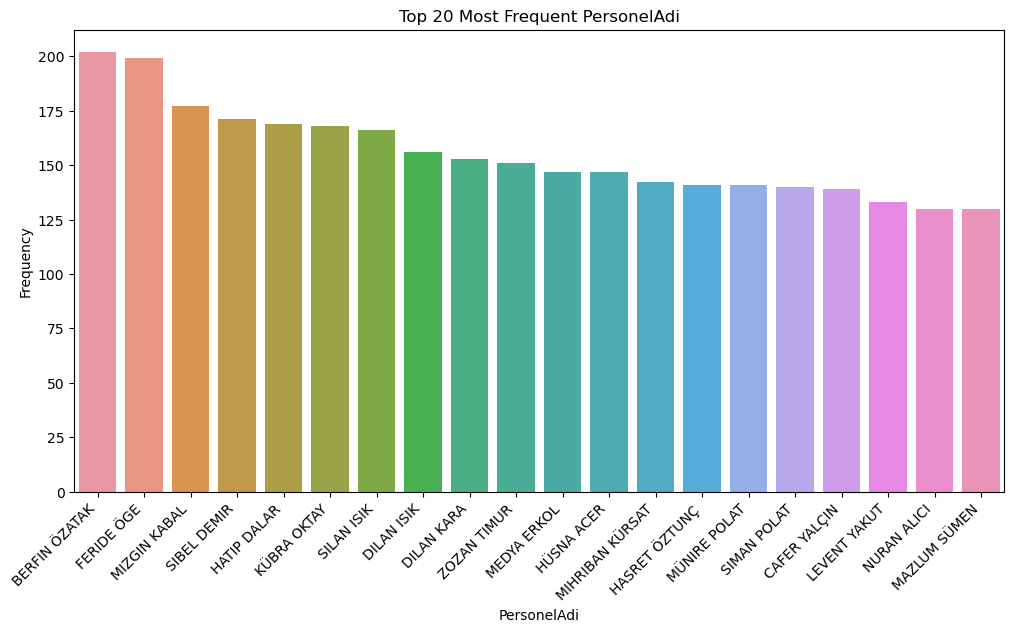

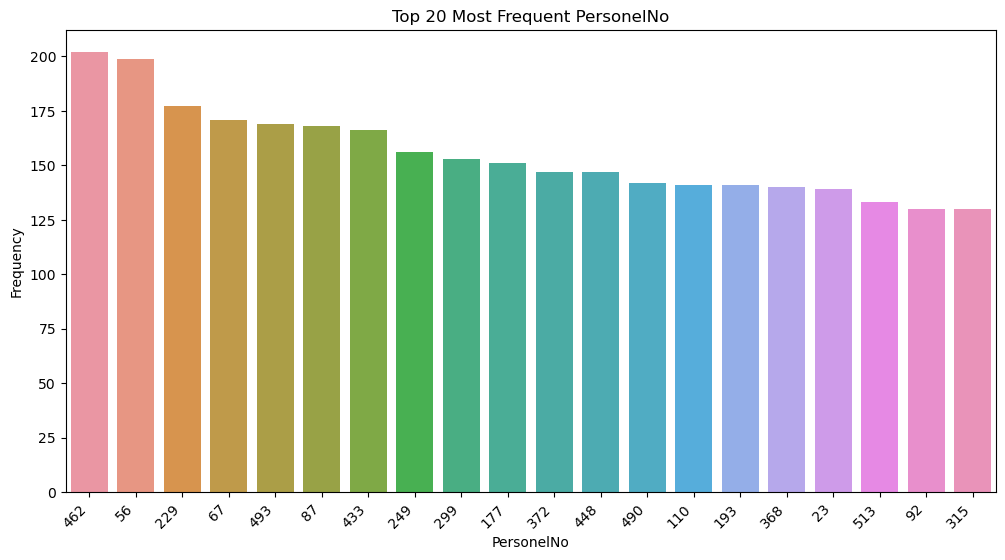

In [44]:
def plot_top_n_values_bar(merged_df, column_name, n=20):
    """
    Herhangi bir kategorik sütun için en sık tekrar eden N değerin frekans grafiğini bar plot olarak çizer.

    Args:
        df (DataFrame): Veri seti
        column_name (str): İncelenecek sütun adı
        n (int): En sık görülen kaç değerin gösterileceği
    """
    # En sık görülen N değeri seç
    top_n_values = merged_df[column_name].value_counts().nlargest(n).index
    
    # DataFrame'i yalnızca en sık görülen N değeri içerecek şekilde filtrele
    df_top_n = merged_df[merged_df[column_name].isin(top_n_values)]
    
    # Bar plot ile görselleştirme
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_top_n, x=column_name, order=top_n_values)
    plt.title(f'Top {n} Most Frequent {column_name}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Frequency')
    plt.xlabel(column_name)
    plt.show()

# Örnek kullanım:
plot_top_n_values_bar(df_filtered, 'PersonelAdi', n=20)
plot_top_n_values_bar(df_filtered, 'PersonelNo', n=20)

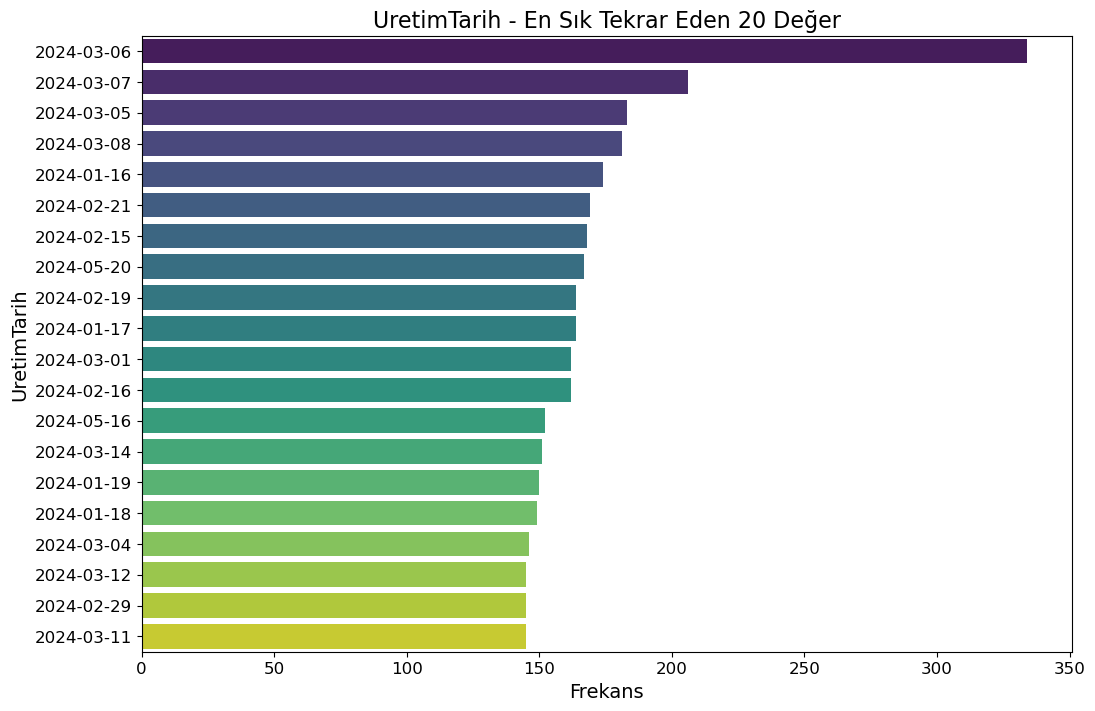

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kategorik değişkenlerin görselleştirileceği kolonlar
columns_to_plot = ['UretimTarih']

# Her bir kolon için en sık geçen 20 değeri görselleştirmek
for column in columns_to_plot:
    # Kolondaki değerlerin frekanslarını hesaplama ve frekanslara göre en yüksekten sıralama
    top_values = df_filtered[column].value_counts().sort_values(ascending=False).iloc[:20]
    
    # Barplot çizdirme
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')
    
    # Grafik başlığı ve etiketler
    plt.title(f"{column} - En Sık Tekrar Eden 20 Değer", fontsize=16)
    plt.xlabel('Frekans', fontsize=14)
    plt.ylabel(column, fontsize=14)
    
    # Y etiketlerini döndürme (gerektiğinde)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    
    # Grafiği gösterme
    plt.show()


### Sayısal değişkenlerin görselleştirilmesi

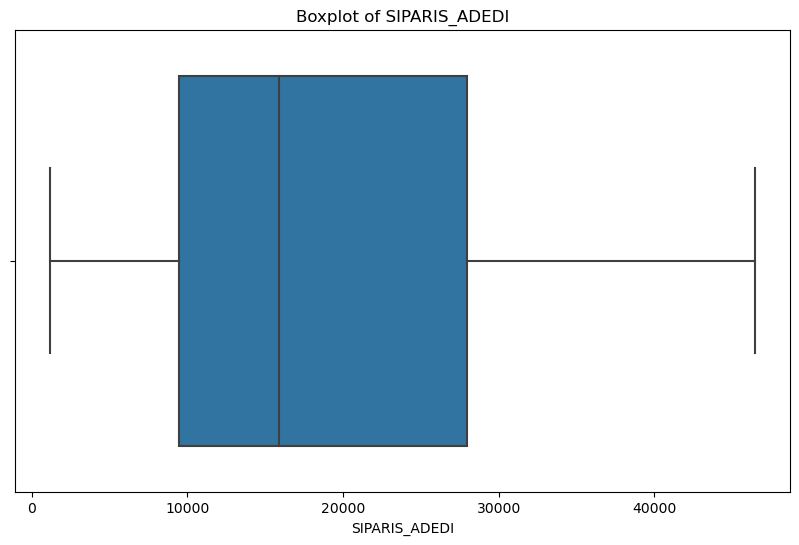

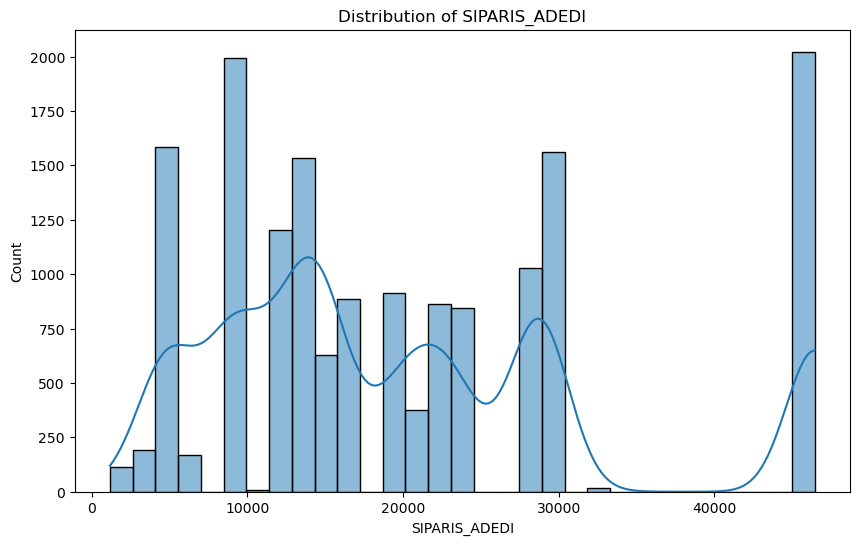

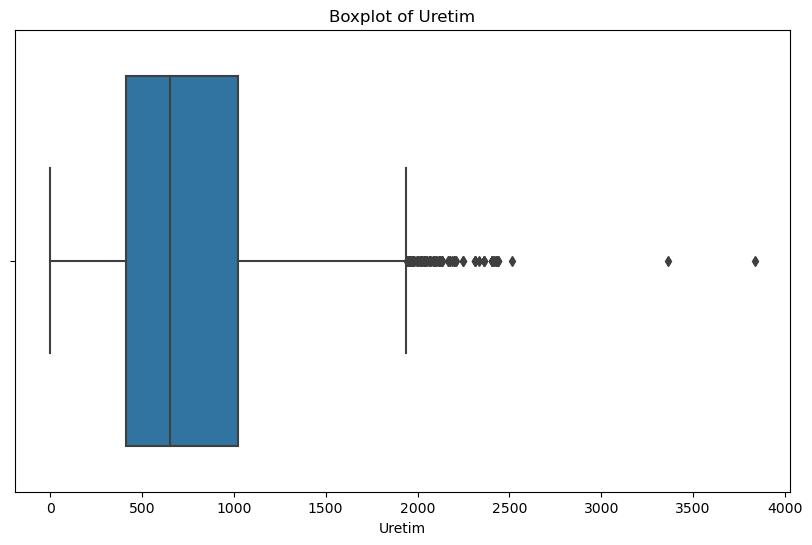

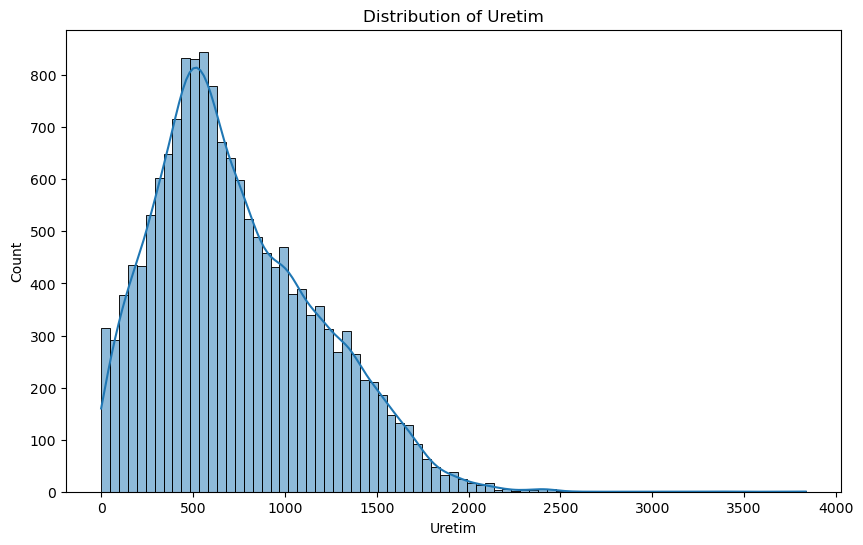

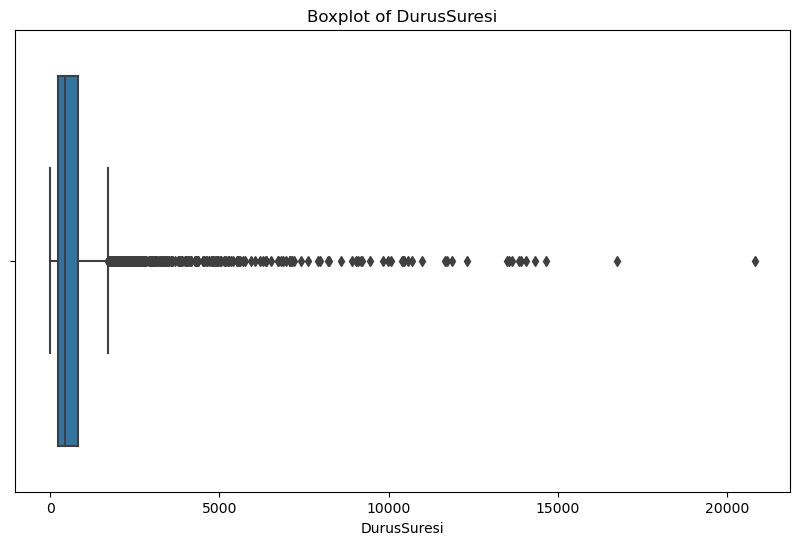

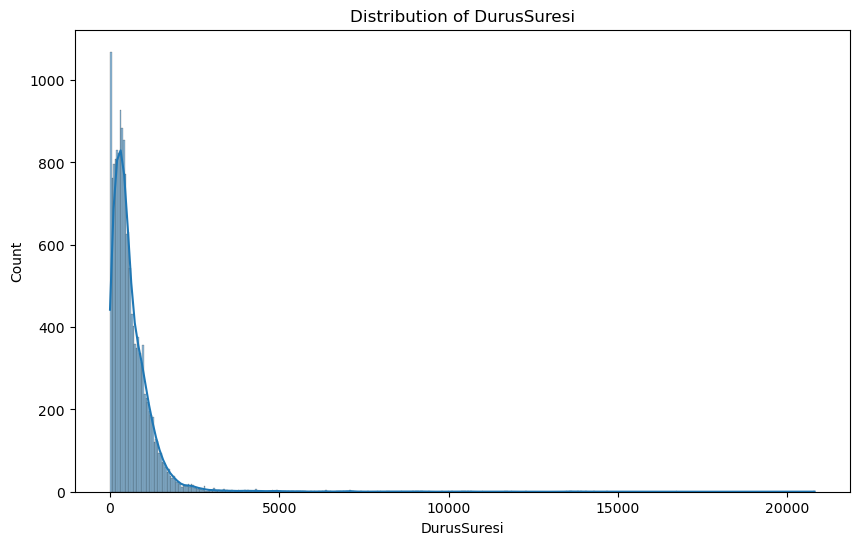

In [41]:
# Numerik değişkenlerin boxplot ve dağılım grafiklerini çiz
for col in numerical_columns:
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_filtered[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    
    # Dağılım grafiği
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtered[col], kde=True, bins='auto')
    plt.title(f'Distribution of {col}')
    plt.show()


### Korelasyon Matrisi

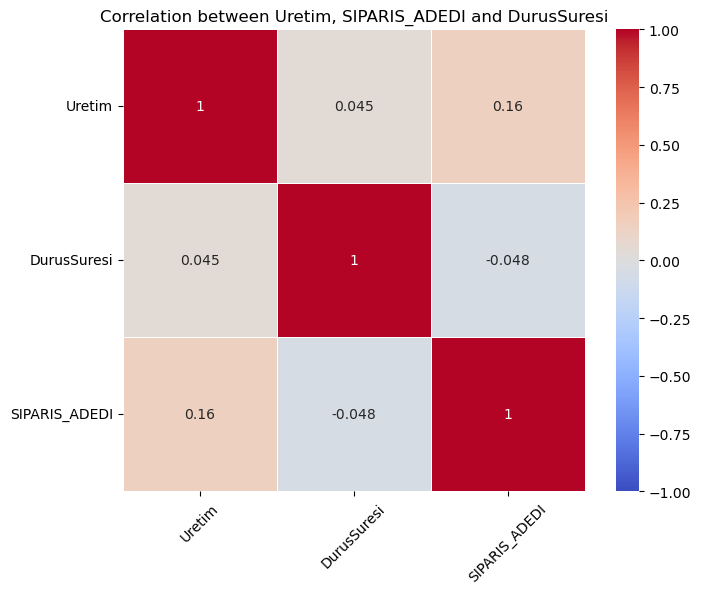

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Uretim ve DurusSuresi sütunlarını seçip bir DataFrame oluştur
subset_df = df_filtered[['Uretim', 'DurusSuresi','SIPARIS_ADEDI']]

# Korelasyon matrisini hesapla
correlation_matrix = subset_df.corr()

# Heatmap'i oluştur
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)

# Başlık ve eksen isimlerini ekle
plt.title('Correlation between Uretim, SIPARIS_ADEDI and DurusSuresi')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## ------------------------------------------------------------------------------------------------------------------------------

## Outlier'ların Temizlenmesi

In [45]:
import pandas as pd

# Numerik kolonları seçme
numeric_columns = df_filtered.select_dtypes(include=['int64', 'float64']).columns

# Outlier'ları tespit etmek için IQR yöntemini kullanma
Q1 = df_filtered[numeric_columns].quantile(0.25)
Q3 = df_filtered[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Outlier'ların dışındaki değerleri filtreleme
df_filtered_no_outlier = df_filtered[~((df_filtered[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_filtered[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Toplam çıkarılan satır sayısını hesaplama
rows_removed = df_filtered.shape[0] - df_filtered_no_outlier.shape[0]

# Çıkarılan satır sayısını yazdırma
print(f"Toplam {rows_removed} adet satır çıkarıldı.")

# df_filtered artık outlier'lardan arındırılmış verileri içerir.
df_filtered = df_filtered_no_outlier


Toplam 712 adet satır çıkarıldı.


### Outlierlar atıldıktan sonra kategorik değişkenlerin görselleştirilmesi

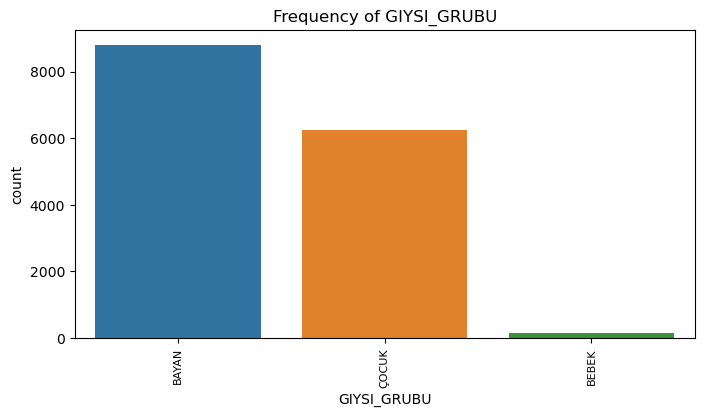

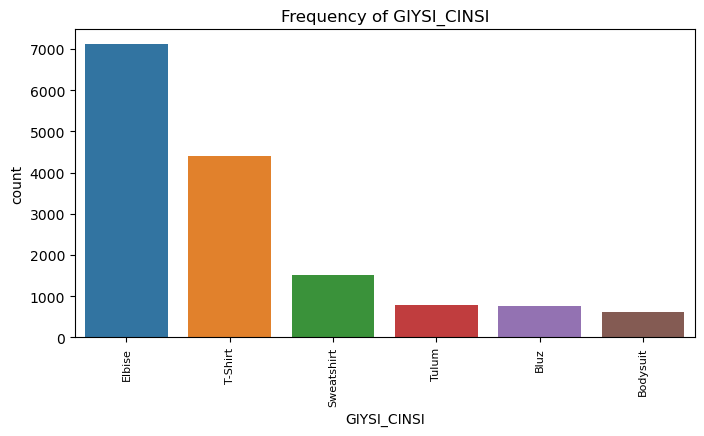

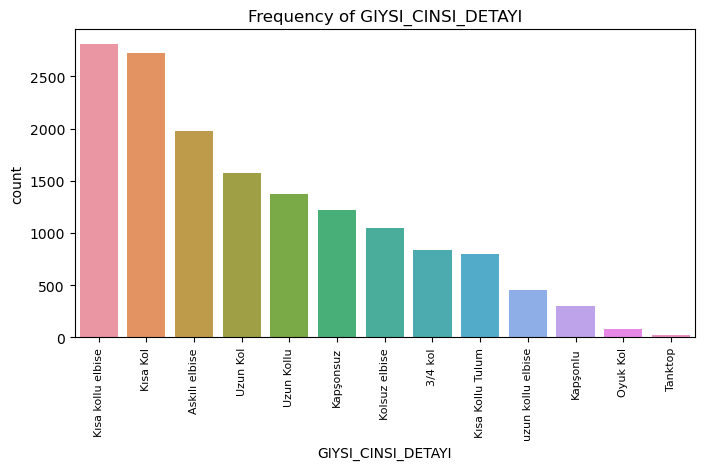

'PersonelNo' kolonunda '196'  fkategorisi sadece 19 kez tekrar ediyor.
'PersonelNo' kolonunda '505'  fkategorisi sadece 19 kez tekrar ediyor.
'PersonelNo' kolonunda '551'  fkategorisi sadece 19 kez tekrar ediyor.
'PersonelNo' kolonunda '497'  fkategorisi sadece 18 kez tekrar ediyor.
'PersonelNo' kolonunda '548'  fkategorisi sadece 18 kez tekrar ediyor.
'PersonelNo' kolonunda '557'  fkategorisi sadece 18 kez tekrar ediyor.
'PersonelNo' kolonunda '52'  fkategorisi sadece 17 kez tekrar ediyor.
'PersonelNo' kolonunda '583'  fkategorisi sadece 17 kez tekrar ediyor.
'PersonelNo' kolonunda '564'  fkategorisi sadece 17 kez tekrar ediyor.
'PersonelNo' kolonunda '612'  fkategorisi sadece 16 kez tekrar ediyor.
'PersonelNo' kolonunda '569'  fkategorisi sadece 15 kez tekrar ediyor.
'PersonelNo' kolonunda '514'  fkategorisi sadece 15 kez tekrar ediyor.
'PersonelNo' kolonunda '477'  fkategorisi sadece 14 kez tekrar ediyor.
'PersonelNo' kolonunda '150'  fkategorisi sadece 13 kez tekrar ediyor.
'Person

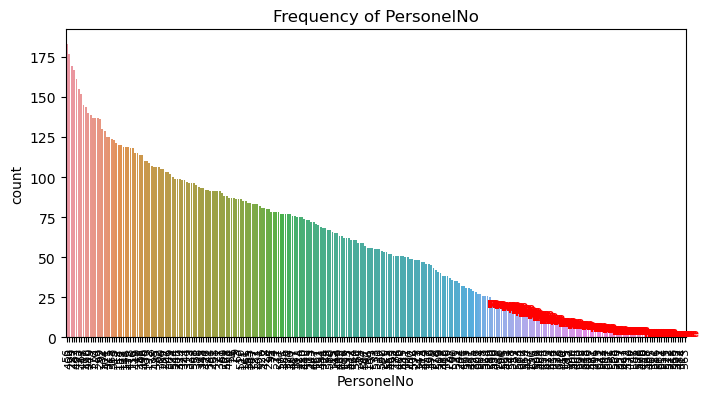

'PersonelAdi' kolonunda 'HAMIDE ATABAY'  fkategorisi sadece 19 kez tekrar ediyor.
'PersonelAdi' kolonunda 'RABIA KARABULAK'  fkategorisi sadece 19 kez tekrar ediyor.
'PersonelAdi' kolonunda 'SEHRISTAN KOÇAK'  fkategorisi sadece 19 kez tekrar ediyor.
'PersonelAdi' kolonunda 'EVINDAR ITAH'  fkategorisi sadece 18 kez tekrar ediyor.
'PersonelAdi' kolonunda 'HALIME ATES'  fkategorisi sadece 18 kez tekrar ediyor.
'PersonelAdi' kolonunda 'ÖZCAN BERGE'  fkategorisi sadece 18 kez tekrar ediyor.
'PersonelAdi' kolonunda 'FELEK ÖZER'  fkategorisi sadece 17 kez tekrar ediyor.
'PersonelAdi' kolonunda 'DOGAN NILI'  fkategorisi sadece 17 kez tekrar ediyor.
'PersonelAdi' kolonunda 'KADER TANKAS'  fkategorisi sadece 17 kez tekrar ediyor.
'PersonelAdi' kolonunda 'DASTAN YILMAZ'  fkategorisi sadece 16 kez tekrar ediyor.
'PersonelAdi' kolonunda 'GÜLSEN BAYRAM'  fkategorisi sadece 15 kez tekrar ediyor.
'PersonelAdi' kolonunda 'ÖMER DEVRAN'  fkategorisi sadece 15 kez tekrar ediyor.
'PersonelAdi' kolonunda 'D

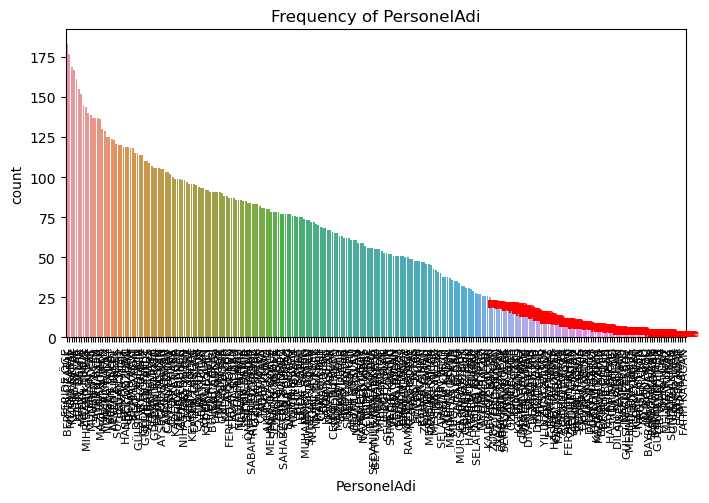

'ModelID' kolonunda '298'  fkategorisi sadece 19 kez tekrar ediyor.
'ModelID' kolonunda '297'  fkategorisi sadece 18 kez tekrar ediyor.
'ModelID' kolonunda '422'  fkategorisi sadece 10 kez tekrar ediyor.
'ModelID' kolonunda '389'  fkategorisi sadece 0 kez tekrar ediyor.


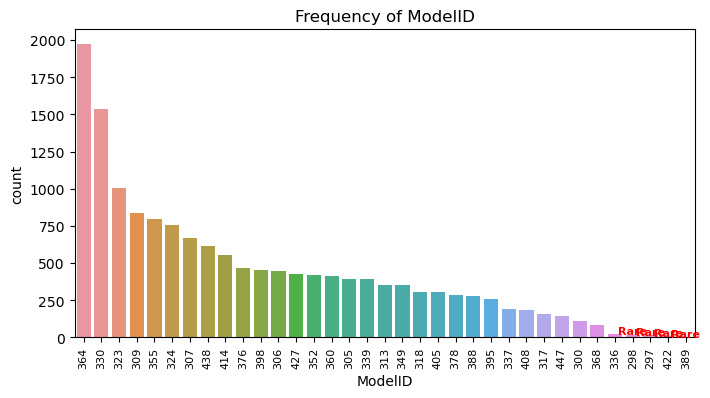

'ModelAdi' kolonunda '308626 TOMMIE TEE ÇIÇEKLI TSHIRT'  fkategorisi sadece 19 kez tekrar ediyor.
'ModelAdi' kolonunda 'CDKS24HDANS-BTL74 T-SHIRT'  fkategorisi sadece 18 kez tekrar ediyor.
'ModelAdi' kolonunda '2228588 JISSOANA ELBISE'  fkategorisi sadece 10 kez tekrar ediyor.
'ModelAdi' kolonunda 'CDKW24HDNDR KIRMIZI TSHIRT'  fkategorisi sadece 0 kez tekrar ediyor.


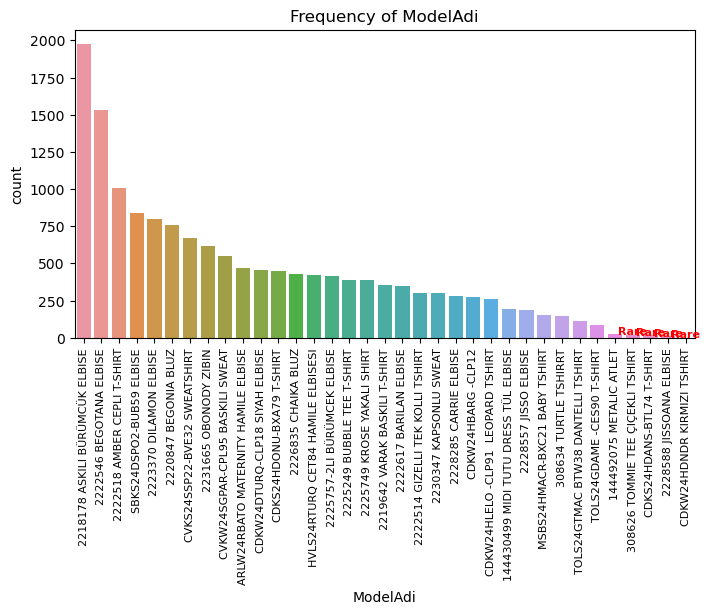

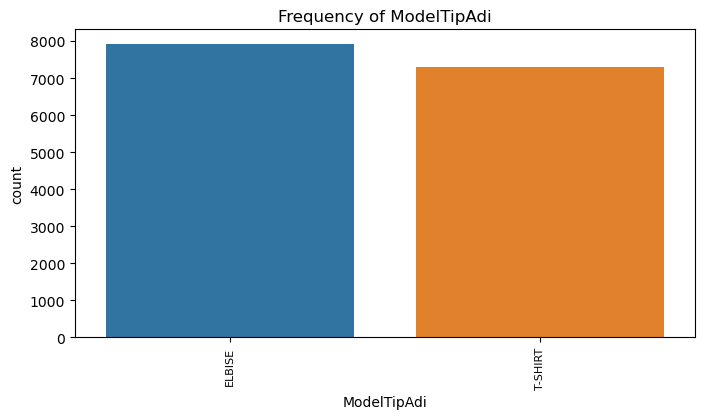

'OrderNo' kolonunda '64410-344-11-105'  fkategorisi sadece 19 kez tekrar ediyor.
'OrderNo' kolonunda 'BTL74'  fkategorisi sadece 18 kez tekrar ediyor.


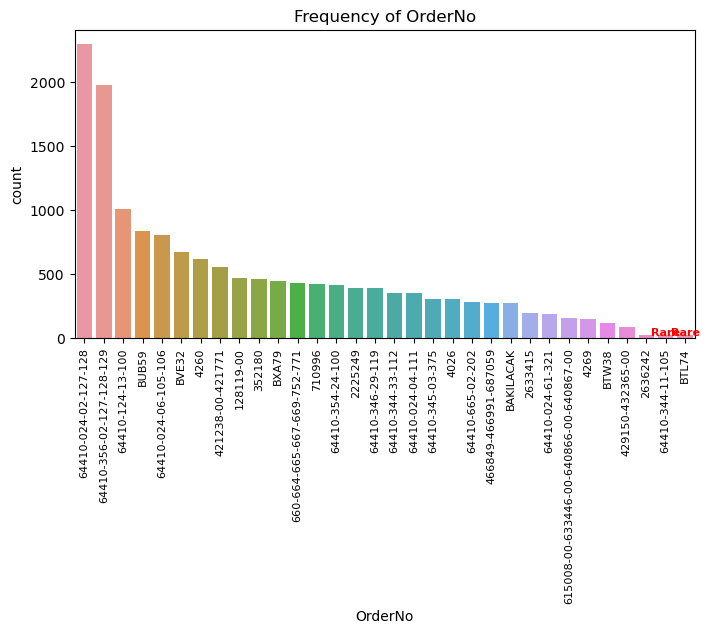

'MakinaTipi' kolonunda 'RACING OVERLOK'  fkategorisi sadece 2 kez tekrar ediyor.


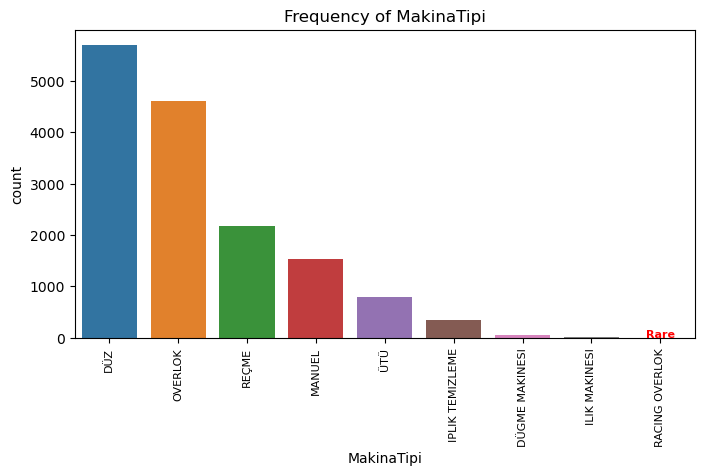

'DurusAdi' kolonunda 'LEKE KONTROL'  fkategorisi sadece 15 kez tekrar ediyor.


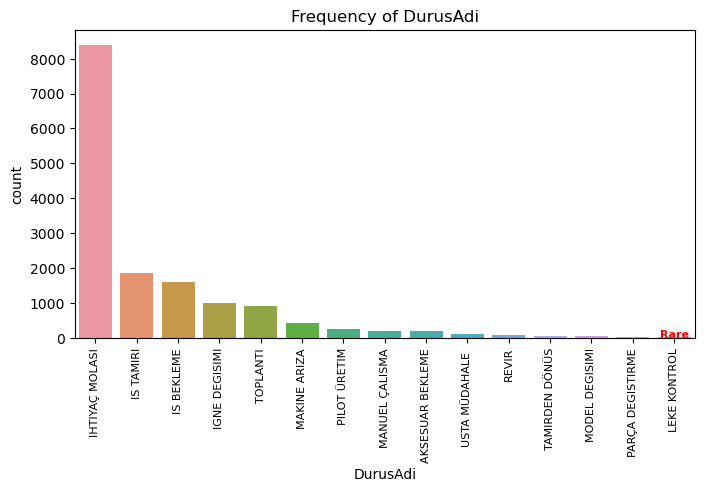

'UretimTarih' kolonunda '2024-06-07'  fkategorisi sadece 18 kez tekrar ediyor.
'UretimTarih' kolonunda '2024-07-24'  fkategorisi sadece 16 kez tekrar ediyor.
'UretimTarih' kolonunda '2024-06-06'  fkategorisi sadece 8 kez tekrar ediyor.
'UretimTarih' kolonunda '2024-03-09'  fkategorisi sadece 8 kez tekrar ediyor.
'UretimTarih' kolonunda '2024-07-23'  fkategorisi sadece 8 kez tekrar ediyor.
'UretimTarih' kolonunda '2024-03-23'  fkategorisi sadece 6 kez tekrar ediyor.
'UretimTarih' kolonunda '2024-03-20'  fkategorisi sadece 5 kez tekrar ediyor.
'UretimTarih' kolonunda '2024-01-06'  fkategorisi sadece 2 kez tekrar ediyor.
'UretimTarih' kolonunda '2024-03-21'  fkategorisi sadece 1 kez tekrar ediyor.


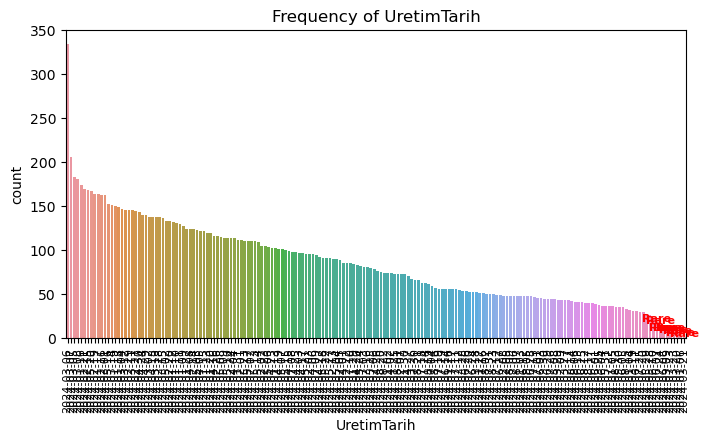

CSV dosyaları kaydedildi: 'sorted_by_column_category.csv' ve 'sorted_by_frequency.csv'


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kategorik ve numerik değişkenleri ayır
categorical_columns = merged_df.select_dtypes(include=['object', 'category']).columns
numerical_columns = merged_df.select_dtypes(include=['number']).columns

# Eşik değeri (threshold) belirleyin
threshold = 20

# Nadir kategorileri saklamak için bir liste oluşturun
rare_categories_list = []

# Kategorik değişkenlerin frekans grafikleri ve nadir kategorilerin işaretlenmesi
for col in categorical_columns:
    plt.figure(figsize=(8, 4))  # Daha küçük bir grafik boyutu ayarlayın
    value_counts = df_filtered_no_outlier[col].value_counts()
    sns.countplot(x=col, data=df_filtered_no_outlier, order=value_counts.index)
    
    # Nadir kategorileri işaretle ve listeye ekle
    rare_categories = value_counts[value_counts < threshold]
    for rare_cat in rare_categories.index:
        print(f"'{col}' kolonunda '{rare_cat}'  fkategorisi sadece {rare_categories[rare_cat]} kez tekrar ediyor.")
        plt.text(x=list(value_counts.index).index(rare_cat), y=rare_categories[rare_cat] + 0.1, s='Rare', 
                 color='red', ha='center', fontsize=8, fontweight='bold')
        
        # Nadir kategoriyi ve kaç kez tekrar ettiğini bir DataFrame olarak kaydet
        rare_categories_list.append({
            'Column': col,
            'Category': rare_cat,
            'Frequency': rare_categories[rare_cat]
        })
    
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=90, fontsize=8)  # Kolon isimlerini dik (90 derece) ve küçük fontta yazdır
    plt.show()

# Nadir kategorileri içeren DataFrame oluşturun
rare_categories_df = pd.DataFrame(rare_categories_list)

# Kategoriyi önce sayısal ise küçükten büyüğe, sonra alfabetik olarak sıralayın
def try_convert_to_float(value):
    value_str = str(value)  # Önce değeri string'e dönüştürüyoruz
    if value_str.replace('.', '', 1).isdigit():
        return float(value_str)
    else:
        return value_str

rare_categories_df['Category_Sorted'] = rare_categories_df['Category'].apply(try_convert_to_float)

# 1. CSV: Kolon, Kategori (Sayısal ise küçükten büyüğe, alfabetik sıralı), Frequency'e göre sıralı
sorted_by_column_category = rare_categories_df.sort_values(by=['Column', 'Category_Sorted', 'Frequency'])
sorted_by_column_category.to_csv('sorted_by_column_category.csv', index=False)

# 2. CSV: Önce Frequency'e, sonra Kolon ve Kategori'ye göre sıralı
sorted_by_frequency = rare_categories_df.sort_values(by=['Frequency', 'Column', 'Category_Sorted'])
sorted_by_frequency.to_csv('sorted_by_frequency.csv', index=False)

print("CSV dosyaları kaydedildi: 'sorted_by_column_category.csv' ve 'sorted_by_frequency.csv'")

### Outlier'lar Temizlendikten Sonra Sayısal Değişkenlerin Grafikleri

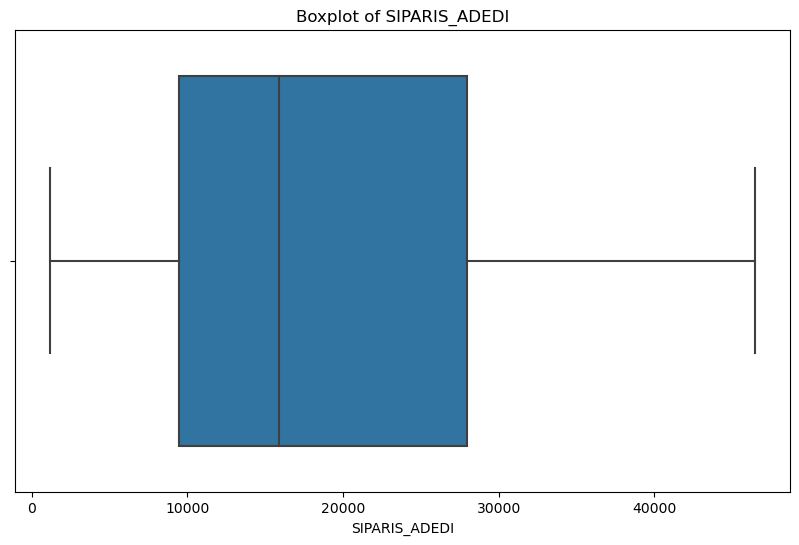

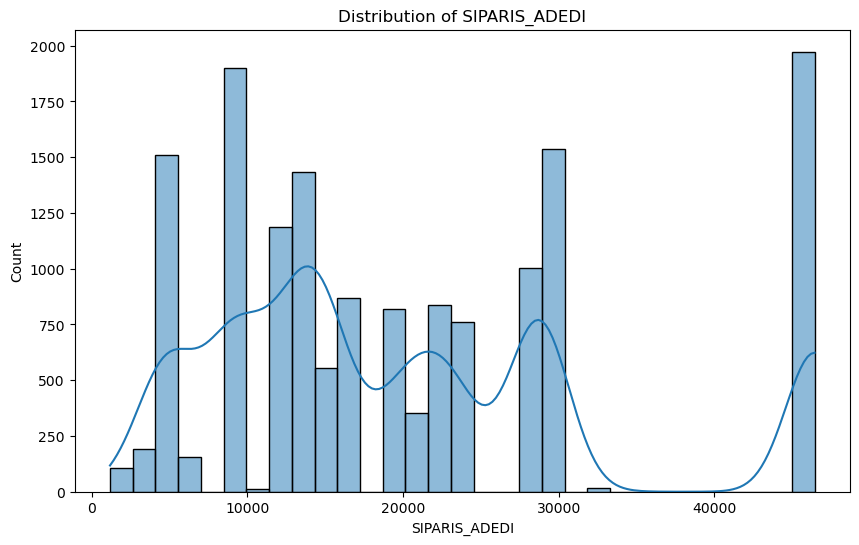

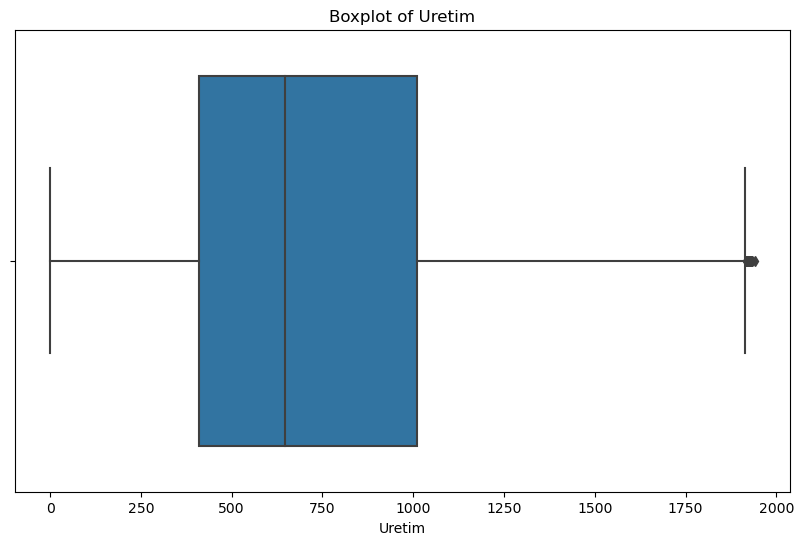

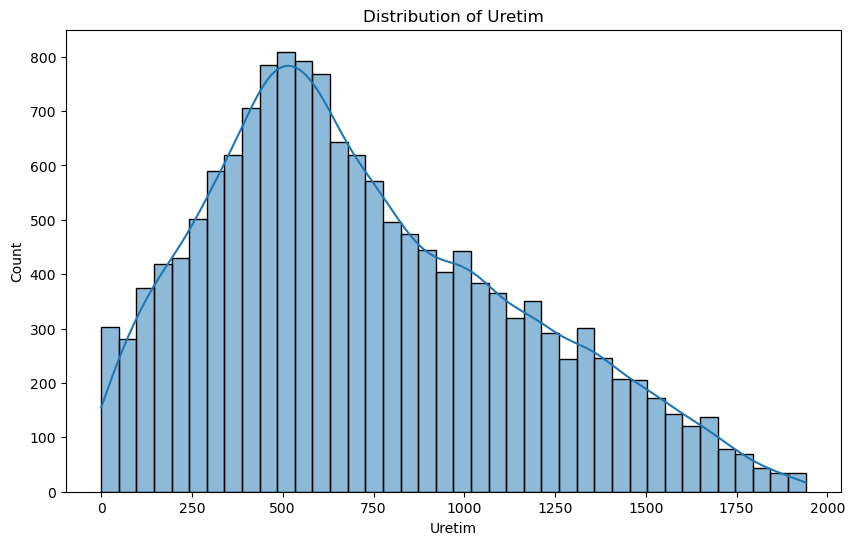

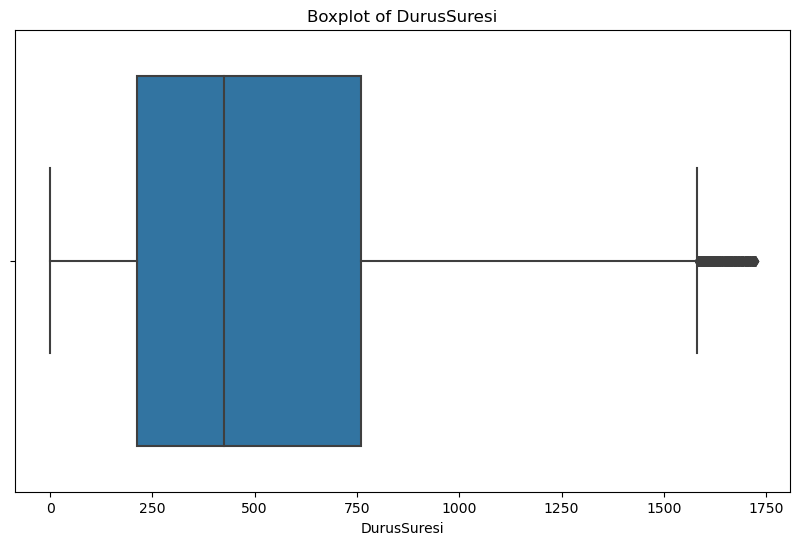

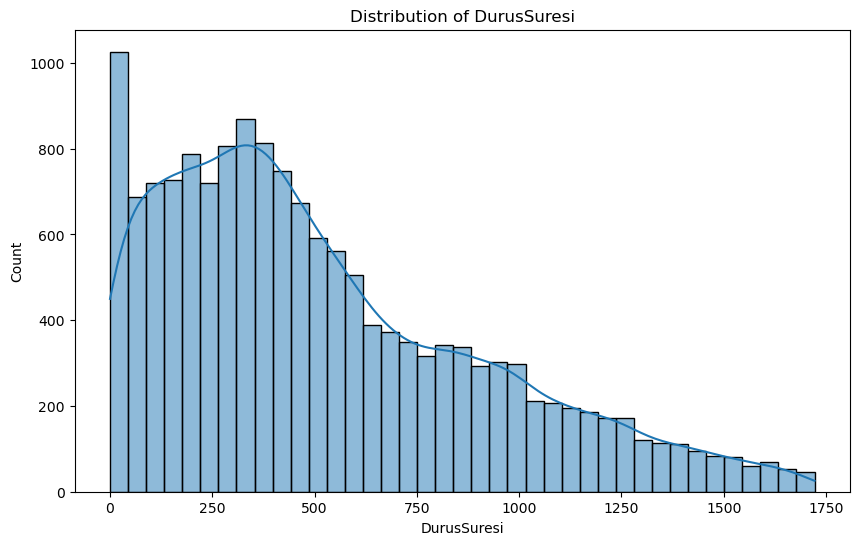

In [49]:
# Numerik değişkenlerin boxplot ve dağılım grafiklerini çiz
for col in numerical_columns:
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_filtered_no_outlier[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    
    # Dağılım grafiği
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtered_no_outlier[col], kde=True, bins='auto')
    plt.title(f'Distribution of {col}')
    plt.show()


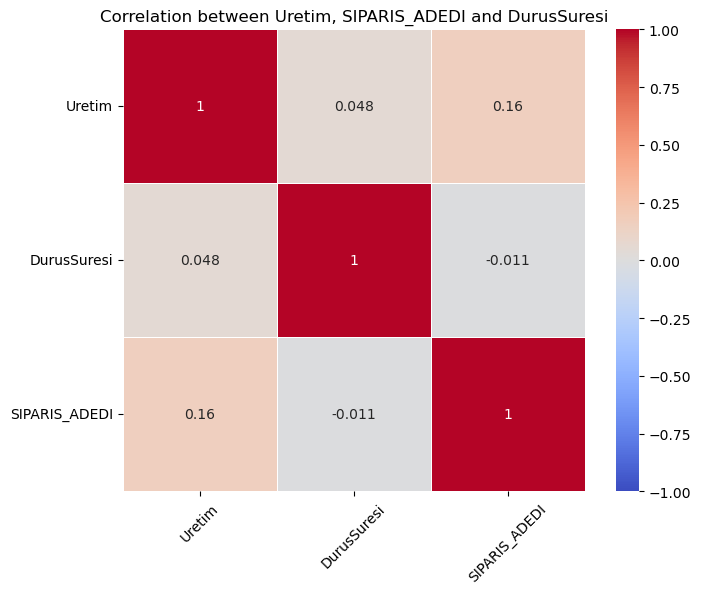

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Uretim ve DurusSuresi sütunlarını seçip bir DataFrame oluştur
subset_df = df_filtered_no_outlier[['Uretim', 'DurusSuresi','SIPARIS_ADEDI']]

# Korelasyon matrisini hesapla
correlation_matrix = subset_df.corr()

# Heatmap'i oluştur
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)

# Başlık ve eksen isimlerini ekle
plt.title('Correlation between Uretim, SIPARIS_ADEDI and DurusSuresi')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## Poisson Testleri

In [57]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# HataAdedi verisini al
data = df_filtered['DurusSuresi']

# Poisson dağılımı için uygunluk testi
poisson_lambda = np.mean(data)
poisson_test = stats.kstest(data, 'poisson', args=(poisson_lambda,))

# Binom dağılımı için uygunluk testi
n = data.max()  # binom için n parametresi belirlenir
p = poisson_lambda / n  # ortalama (λ) ile p parametresi hesaplanır
binom_test = stats.kstest(data, 'binom', args=(n, p))

# Geometrik dağılım için uygunluk testi
p_geom = 1 / (np.mean(data) + 1)  # Geometrik dağılım için p parametresi
geometric_test = stats.kstest(data, 'geom', args=(p_geom,))

# Negatif Binom dağılımı için uygunluk testi
mean = np.mean(data)
var = np.var(data)
r = mean**2 / (var - mean)  # negatif binom için r parametresi
p_neg_binom = mean / var  # negatif binom için p parametresi
neg_binom_test = stats.kstest(data, 'nbinom', args=(r, p_neg_binom))

# Sonuçları yazdır
print(f"Poisson Dağılımı Uygunluk Testi: p-değeri = {poisson_test.pvalue}")
print(f"Binom Dağılımı Uygunluk Testi: p-değeri = {binom_test.pvalue}")
print(f"Geometrik Dağılım Uygunluk Testi: p-değeri = {geometric_test.pvalue}")
print(f"Negatif Binom Dağılımı Uygunluk Testi: p-değeri = {neg_binom_test.pvalue}")


Poisson Dağılımı Uygunluk Testi: p-değeri = 0.0
Binom Dağılımı Uygunluk Testi: p-değeri = 0.0
Geometrik Dağılım Uygunluk Testi: p-değeri = 5.329447006878252e-116
Negatif Binom Dağılımı Uygunluk Testi: p-değeri = 2.430221370264123e-33


In [58]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Veriyi al
data = df_filtered['DurusSuresi']

# Genelleştirilmiş Pareto Dağılımı için uygunluk testi
params_gpd = stats.genpareto.fit(data)
gpd_test = stats.kstest(data, 'genpareto', args=params_gpd)

# Weibull Dağılımı için uygunluk testi
params_weibull = stats.weibull_min.fit(data, floc=0)
weibull_test = stats.kstest(data, 'weibull_min', args=params_weibull)

# Pareto Dağılımı için uygunluk testi
params_pareto = stats.pareto.fit(data, floc=0)
pareto_test = stats.kstest(data, 'pareto', args=params_pareto)

# Sonuçları yazdır
print(f"Genelleştirilmiş Pareto Dağılımı Uygunluk Testi: p-değeri = {gpd_test.pvalue}")
print(f"Weibull Dağılımı Uygunluk Testi: p-değeri = {weibull_test.pvalue}")
print(f"Pareto Dağılımı Uygunluk Testi: p-değeri = {pareto_test.pvalue}")


Genelleştirilmiş Pareto Dağılımı Uygunluk Testi: p-değeri = 0.0
Weibull Dağılımı Uygunluk Testi: p-değeri = 5.177973085995182e-23
Pareto Dağılımı Uygunluk Testi: p-değeri = nan


C:\Users\berk_\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7422: RuntimeWarning: divide by zero encountered in divide
  return ndata / np.sum(np.log((data - location) / scale))
C:\Users\berk_\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7422: RuntimeWarning: invalid value encountered in divide
  return ndata / np.sum(np.log((data - location) / scale))
C:\Users\berk_\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\berk_\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
